# Support Vector Machine (SVM)
The Support Vector Machine algorithm is used for classification (SVC) and regression (SVR) tasks. It finds the best hyperplane that separates data points of one class from those of the other class. The $\textbf{support vectors}$ are the feature vectors that are closest to the separating hyperplane.
The best hyperplane is the one with the largest margin between two classes of points. The $\textbf{Margin}$ $M$ is the distance between the separating hyperplane and the nearest feature vectors from both classes.

$$M=\frac{\bar{w}^T\cdot(\bar{x}_{pos}-\bar{x}_{neg})}{\lVert \bar{w} \rVert}=\frac{2}{\lVert \bar{w} \rVert}$$

where $\bar{w}$ is a vector perpendicular to the separating hyperplane and $\bar{x}_{pos}$ , $\bar{x}_{neg}$ are the support vectors for the positive and negative classes respectively. $M$ is maximized under the constraints

$$w_0 + \bar{w}^T\bar{x}^{(i)}\geq 1 \ if \ y^{(i)}=1$$
$$w_0 + \bar{w}^T\bar{x}^{(i)}< 1 \ if \ y^{(i)}=-1$$

These two equations say that all negative samples should fall on one side of the negative hyperplane, whereas all the positive samples should fall on the opposite side of the positive hyperplane.

The nonlinear SVM is implemented using nonlinear basis function $\varphi(x)$. To maximize the margin requires the computation of the inner product $K(x)=\varphi^{T}(x)\cdot\varphi(x)$ called kernel. The $\textbf{kernel trick}$ consists in calculating directly $K(x)$ without performing the transformation $x\rightarrow\varphi(x)$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Load the dataset

In [2]:
df = pd.read_excel('../Datasets/Circles.xls')

## Explore the dataset

In [3]:
df.head()

,x1,x2,y
0,0.846650,0.487330,0
1,-1.038498,-0.274275,0
2,1.036908,-0.384525,0
3,-0.584862,0.996709,0
4,1.033636,0.373811,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.00000
mean,-0.000940,0.001201,0.50000
std,0.522123,0.523933,0.50025
min,-1.184377,-1.175856,0.00000
25%,-0.260947,-0.249323,0.00000
50%,0.009533,0.004013,0.50000
75%,0.245396,0.243363,1.00000
max,1.214431,1.255872,1.00000


In [6]:
df['y'].unique()

array([0, 1])

## Select the features

In [7]:
x = df[['x1','x2']]
y = df['y']

## Split into train and test sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

## Scale the features

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Kernel

## Train the model

In [10]:
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Make predictions

In [11]:
y_pred = model.predict(x_test)

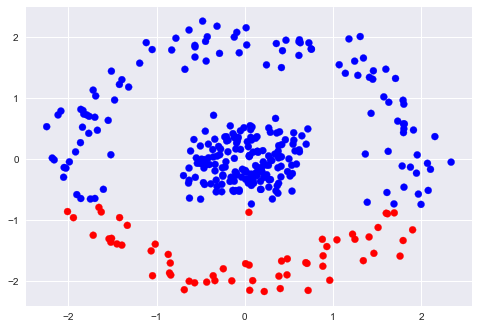

In [12]:
color = pd.Series(y_pred).map({0:'red',1:'blue'})

plt.scatter(x_test[:,0],x_test[:,1],c=color)
plt.show()

## Evaluate the model

In [13]:
model.score(x_test,y_test)

0.67272727272727273

# Polynomial Kernel

## Train the model

In [14]:
model = SVC(kernel='poly',degree=2)
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Make predictions

In [15]:
y_pred = model.predict(x_test)

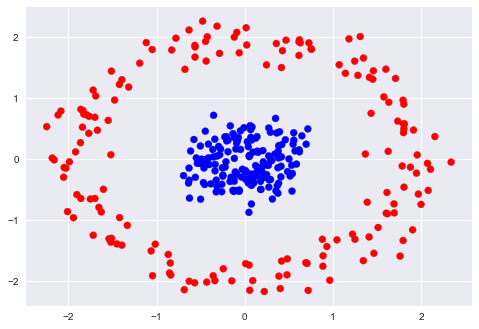

In [16]:
color = pd.Series(y_pred).map({0:'red',1:'blue'})

plt.scatter(x_test[:,0],x_test[:,1],c=color)
plt.show()

## Evaluate the model

In [17]:
model.score(x_test,y_test)

1.0

# RBF Kernel

## Train the model

In [18]:
model = SVC(kernel='rbf',gamma=1)
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Make predictions

In [19]:
y_pred = model.predict(x_test)

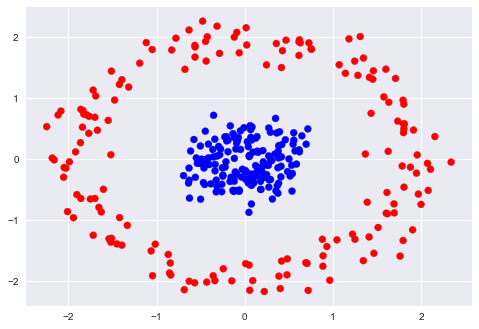

In [20]:
color = pd.Series(y_pred).map({0:'red',1:'blue'})

plt.scatter(x_test[:,0],x_test[:,1],c=color)
plt.show()

## Evaluate the model

In [21]:
model.score(x_test,y_test)

1.0